<a href="https://colab.research.google.com/github/yohanesnuwara/DASLab/blob/main/notebooks/DASCatalogMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install basemap then restart runtime
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
     | 149.3MB 130.2MB/s
     |████████████████████████████████| 6.6MB 5.2MB/s 
     |████████████████████████████████| 225kB 33.8MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759604 sha256=f50a0c3d3e11210de159f113ec97c880a8dab5b844da19a0f64d88c1db2e379b
  Stored in directory: /tmp/pip-ephem-wheel-cache-3v8fbkav/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.wh

     |████████████████████████████████| 2.8MB 6.5MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702462 sha256=9b2626938ffa6dae2e33ac44c45a159d86bd91b4f8995e42ef736b2b9fbc74b8
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 3.1.0
    Uninstalling pyproj-3.1.0:
      Successfully uninstalled pyproj-3.1.0


In [ ]:
!pip install -q utm
!pip install -q nptdms==0.25.0 # older version

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utm

plt.rcParams["font.size"] = 20

     |████████████████████████████████| 153kB 5.2MB/s 


In [ ]:
# Access DASLab repository
!git clone 'https://github.com/yohanesnuwara/DASLab'

import sys
sys.path.append('/content/DASLab')
from input_output import readJMA_csv, getInfoFromJMA
from dasplot import plotBasemap

Cloning into 'DASLab'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (277/277), done.
remote: Compressing objects: 100% (272/272), done.
remote: Total 277 (delta 157), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (277/277), 11.09 MiB | 9.04 MiB/s, done.
Resolving deltas: 100% (157/157), done.


In [ ]:
# Connect to Goo Drive to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Access JMA catalogue

In [ ]:
# Read catalog into dataframe
filepath = '/content/EQ_LIST_06.csv'

catalog_df = readJMA_csv(filepath)
catalog_df

,Date,Time,Lat,Lon,Dep,Mag,Loc
0,2020-05-29,00:03:02.850000,37.139,139.856,8.4,0.0,NORTHERN TOCHIGI PREF k
1,2020-05-29,00:04:16.250000,37.136,139.857,8.6,0.3,NORTHERN TOCHIGI PREF A
2,2020-05-29,00:04:41.690000,32.773,132.253,11.3,1.0,HYUGANADA REGION A
3,2020-05-29,00:04:42.710000,36.212,139.755,56.6,0.4,SW IBARAKI PREF A
4,2020-05-29,00:07:02.190000,36.330,137.630,6.0,0.0,HIDA MOUNTAINS REGION A
...,...,...,...,...,...,...,...
29760,2020-07-02,23:41:22.930000,24.897,123.363,29.0,1.3,NW OFF ISHIGAKIJIMA IS k
29761,2020-07-02,23:43:36.760000,42.925,145.701,39.0,0.7,OFF NEMURO PENINSULA A
29762,2020-07-02,23:44:12.320000,31.748,131.617,32.9,2.2,HYUGANADA REGION K
29763,2020-07-02,23:55:25.280000,41.215,142.717,20.5,1.9,E OFF AOMORI PREF k


In [ ]:
# # Read catalog into dataframe
# filepath = '/content/DASLab/data/JMA_original_2020Jan_2020Apr.csv'

# catalog_df = readJMA_csv(filepath)
# catalog_df

Convert Lat-Long to UTM

In [ ]:
# Convert Lat-Long to UTM
lat, lon = catalog_df.Lat.values, catalog_df.Lon.values

a, b, c, d = utm.from_latlon(lat, lon, 54, 'N')
utmE = a / 1000
utmN = b / 1000   

catalog_df['UTM_E'] = utmE
catalog_df['UTM_N'] = utmN

catalog_df

,Date,Time,Lat,Lon,Dep,Mag,Loc,UTM_E,UTM_N
0,2020-05-29,00:03:02.850000,37.139,139.856,8.4,0.0,NORTHERN TOCHIGI PREF k,398.395118,4110.904735
1,2020-05-29,00:04:16.250000,37.136,139.857,8.6,0.3,NORTHERN TOCHIGI PREF A,398.479928,4110.570839
2,2020-05-29,00:04:41.690000,32.773,132.253,11.3,1.0,HYUGANADA REGION A,-320.517920,3660.186875
3,2020-05-29,00:04:42.710000,36.212,139.755,56.6,0.4,SW IBARAKI PREF A,388.089520,4008.181140
4,2020-05-29,00:07:02.190000,36.330,137.630,6.0,0.0,HIDA MOUNTAINS REGION A,197.487945,4025.825420
...,...,...,...,...,...,...,...,...,...
29760,2020-07-02,23:41:22.930000,24.897,123.363,29.0,1.3,NW OFF ISHIGAKIJIMA IS k,-1299.619017,2872.679346
29761,2020-07-02,23:43:36.760000,42.925,145.701,39.0,0.7,OFF NEMURO PENINSULA A,883.668039,4763.218080
29762,2020-07-02,23:44:12.320000,31.748,131.617,32.9,2.2,HYUGANADA REGION K,-390.471614,3551.083241
29763,2020-07-02,23:55:25.280000,41.215,142.717,20.5,1.9,E OFF AOMORI PREF k,643.934957,4564.045778


## Geometrical calculations (epicentral distance, hypocentral distance, azimuth, incidence angle)

In [ ]:
def hypoDistance(cord1, cord2):
  x1, y1, z1 = cord1
  x2, y2, z2 = cord2
  return np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)

def epiDistance(cord1, cord2):
  x1, y1, _ = cord1
  x2, y2, _ = cord2
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)

def incAngle(cord1, cord2):
  _, _, z1 = cord1
  _, _, z2 = cord2
  hypo_dist = hypoDistance(cord1, cord2)
  dip = np.rad2deg(np.arcsin((z2 - z1) / hypo_dist))
  return 90 - dip

def azimuth(cord1, cord2):
  x1, y1, _ = cord1
  x2, y2, _ = cord2
  return np.rad2deg(np.arctan((x2 -x1)/(y2 -y1)))

In [ ]:
# Ichihara site coordinate (UTM)
ichi_cord = (426.7747392664837, 3930.0408808721904, -0.8)

# Calculate hypo-distance, epi-distance, incident angle, azimuth
hypo_cord = [(catalog_df.UTM_E.values[i], catalog_df.UTM_N.values[i], 
              catalog_df.Dep.values[i]) for i in range(len(catalog_df))]

hypo_dist = [hypoDistance(ichi_cord, hypo_cord[i]) for i in range(len(hypo_cord))]

epi_dist = [epiDistance(ichi_cord, hypo_cord[i]) for i in range(len(hypo_cord))]

inc_angle = [incAngle(ichi_cord, hypo_cord[i]) for i in range(len(hypo_cord))]

azim = [azimuth(ichi_cord, hypo_cord[i]) for i in range(len(hypo_cord))]

catalog_df['HypoDistance'] = hypo_dist
catalog_df['EpiDistance'] = epi_dist
catalog_df['IncAngle'] = inc_angle
catalog_df['Azimuth'] = azim

catalog_df

,Date,Time,Lat,Lon,Dep,Mag,Loc,UTM_E,UTM_N,HypoDistance,EpiDistance,IncAngle,Azimuth
0,2020-05-29,00:03:02.850000,37.139,139.856,8.4,0.0,NORTHERN TOCHIGI PREF k,398.395118,4110.904735,183.307874,183.076860,87.123186,-8.917654
1,2020-05-29,00:04:16.250000,37.136,139.857,8.6,0.3,NORTHERN TOCHIGI PREF A,398.479928,4110.570839,182.975469,182.733856,87.055247,-8.907612
2,2020-05-29,00:04:41.690000,32.773,132.253,11.3,1.0,HYUGANADA REGION A,-320.517920,3660.186875,794.615576,794.523444,89.127495,70.144899
3,2020-05-29,00:04:42.710000,36.212,139.755,56.6,0.4,SW IBARAKI PREF A,388.089520,4008.181140,104.389685,87.192009,56.642402,-26.338821
4,2020-05-29,00:07:02.190000,36.330,137.630,6.0,0.0,HIDA MOUNTAINS REGION A,197.487945,4025.825420,248.582687,248.489662,88.432474,-67.327271
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29760,2020-07-02,23:41:22.930000,24.897,123.363,29.0,1.3,NW OFF ISHIGAKIJIMA IS k,-1299.619017,2872.679346,2024.681915,2024.462599,89.156670,58.513849
29761,2020-07-02,23:43:36.760000,42.925,145.701,39.0,0.7,OFF NEMURO PENINSULA A,883.668039,4763.218080,951.062445,950.229306,87.601590,28.739249
29762,2020-07-02,23:44:12.320000,31.748,131.617,32.9,2.2,HYUGANADA REGION K,-390.471614,3551.083241,901.463357,900.833222,87.857575,65.122816
29763,2020-07-02,23:55:25.280000,41.215,142.717,20.5,1.9,E OFF AOMORI PREF k,643.934957,4564.045778,670.503139,670.164733,88.179568,18.907427


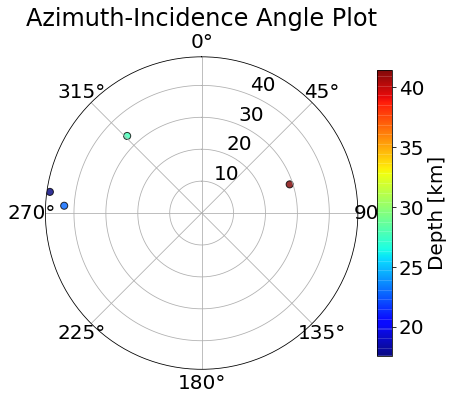

In [ ]:
# Select events (shallow hypocenter <50 km, near earthquakes <50 km
# very small magnitudes <1)
dfx = catalog_df[(catalog_df.Mag==0.8) & (catalog_df.Dep<50) & (catalog_df.HypoDistance<50)]

# Polar plot of events
plt.rcParams["font.size"] = 20

angle = dfx.IncAngle.values
azi = dfx.Azimuth.values

f = plt.figure(figsize=(7,7))
ax = f.add_subplot(111, projection='polar')
im = ax.scatter(azi*np.pi/180, angle, lw=1, c=dfx.Dep.values, s=50, 
                cmap='jet', alpha=0.8, edgecolor='black')
h = f.colorbar(im, shrink=0.75)
h.set_label('Depth [km]')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1) # clockwise
ax.grid(True)
ax.set_title('Azimuth-Incidence Angle Plot', pad=15)

plt.show()

In [ ]:
print(catalog_df[(catalog_df.Date=='2020-02-06') & (catalog_df.Mag>5)].iloc[:,:2])

           Date             Time
9637 2020-02-06  20:19:56.610000


In [ ]:
x = catalog_df[(catalog_df.Mag==0.8) & (catalog_df.Dep<50) & (catalog_df.Dep>=31) & 
           (catalog_df.HypoDistance<50) & (catalog_df.IncAngle<40)]

x

,Date,Time,Lat,Lon,Dep,Mag,Loc,UTM_E,UTM_N,HypoDistance,EpiDistance,IncAngle,Azimuth
2178,2020-01-23,01:37:10.460000,35.360,140.217,38.6,0.8,SOUTHERN BOSO PENINSULA k,428.863560,3913.248190,42.880271,16.922105,23.243283,-7.090527
24328,2020-02-29,19:19:06.700000,35.480,140.408,32.0,0.8,KUJUKURI COAST BOSO PEN A,446.296065,3926.436390,38.339464,19.851310,31.183285,-79.538518
39062,2020-03-25,23:57:55.820000,35.587,140.267,36.7,0.8,CENTRAL CHIBA PREF A,433.593126,3938.389498,39.018455,10.779138,16.036963,39.238807
41399,2020-03-30,17:26:00.460000,35.392,140.384,31.0,0.8,KUJUKURI COAST BOSO PEN A,444.058012,3916.689956,38.577179,21.839384,34.480232,-52.314750
41699,2020-03-31,04:11:58.170000,35.378,140.387,36.2,0.8,KUJUKURI COAST BOSO PEN A,444.320840,3915.135588,43.577901,23.022455,31.891051,-49.652326


In [ ]:
print(x.iloc[:,:2])

            Date             Time
2178  2020-01-23  01:37:10.460000
24328 2020-02-29  19:19:06.700000
39062 2020-03-25  23:57:55.820000
41399 2020-03-30  17:26:00.460000
41699 2020-03-31  04:11:58.170000


## Select events from catalog based on TDMS file

In [ ]:
file = '/content/drive/MyDrive/RITE_Yohanes/20210209/data/connected whole_UTC_20200220_063300.000.tdms'

getInfoFromJMA(file, catalog_df)
getInfoFromJMA(file, catalog_df, print_info=False)

Info for file connected whole_UTC_20200220_063300.000
Date           : 2020-02-20T00:00:00.000000000
Time           : 15:33:27.440000
Magnitude      : 2.0
Lat, Lon, Depth: (35.578, 140.019, 45.6)
Location       : CENTRAL CHIBA PREF  K
Info for file connected whole_UTC_20200220_063300.000
Date           : 2020-02-20T00:00:00.000000000
Time           : 15:33:36.830000
Magnitude      : 2.8
Lat, Lon, Depth: (35.392, 140.316, 27.5)
Location       : KUJUKURI COAST BOSO PEN  K
Info for file connected whole_UTC_20200220_063300.000
Date           : 2020-02-20T00:00:00.000000000
Time           : 15:33:46.620000
Magnitude      : 1.3
Lat, Lon, Depth: (39.279, 142.267, 30.5)
Location       : E OFF IWATE PREF  A


,Date,Time,Lat,Lon,Dep,Mag,Loc,UTM_E,UTM_N,HypoDistance,EpiDistance,IncAngle,Azimuth
17873,2020-02-20,15:33:27.440000,35.578,140.019,45.6,2.0,CENTRAL CHIBA PREF K,411.114746,3937.586876,49.549343,17.383251,20.537911,-64.272232
17874,2020-02-20,15:33:36.830000,35.392,140.316,27.5,2.8,KUJUKURI COAST BOSO PEN K,437.882505,3916.730533,33.187917,17.336315,31.491245,-39.845710
17875,2020-02-20,15:33:46.620000,39.279,142.267,30.5,1.3,E OFF IWATE PREF A,609.281372,4348.503288,457.601516,456.529799,86.077899,23.563762


In [ ]:
import os
import glob

filepth = "/content/drive/MyDrive/RITE_Yohanes/20210209/data"
read_files = sorted(glob.glob(os.path.join(filepth, "*.tdms")))

df_select = []
for files in read_files:
  df = getInfoFromJMA(files, catalog_df, print_info=False)
  df_select.append(df)

df_select = pd.concat(df_select)
df_select

No info for file connected whole_UTC_20200226_132400.000. Check in catalog.


,Date,Time,Lat,Lon,Dep,Mag,Loc,UTM_E,UTM_N,HypoDistance,EpiDistance,IncAngle,Azimuth
17789,2020-02-20,12:53:08.270000,35.396,140.311,27.7,4.3,.0V KUJUKURI COAST BOSO PEN K,437.431512,3917.177309,33.034653,16.704440,30.375450,-39.639909
17873,2020-02-20,15:33:27.440000,35.578,140.019,45.6,2.0,CENTRAL CHIBA PREF K,411.114746,3937.586876,49.549343,17.383251,20.537911,-64.272232
17874,2020-02-20,15:33:36.830000,35.392,140.316,27.5,2.8,KUJUKURI COAST BOSO PEN K,437.882505,3916.730533,33.187917,17.336315,31.491245,-39.845710
17875,2020-02-20,15:33:46.620000,39.279,142.267,30.5,1.3,E OFF IWATE PREF A,609.281372,4348.503288,457.601516,456.529799,86.077899,23.563762
19856,2020-02-22,07:32:40.720000,35.343,140.216,21.2,1.4,SOUTHERN BOSO PENINSULA A,428.757779,3911.363505,28.927095,18.782353,40.488822,-6.060581
22664,2020-02-26,22:23:52.520000,35.448,140.398,30.1,1.3,KUJUKURI COAST BOSO PEN A,445.367257,3922.892861,36.763922,19.919235,32.807263,-68.970404
23937,2020-02-29,03:38:40.670000,35.482,140.391,29.9,0.8,KUJUKURI COAST BOSO PEN A,444.755241,3926.667586,35.737481,18.294195,30.790803,-79.374339
24658,2020-03-01,07:22:10.870000,35.398,140.311,28.1,1.4,KUJUKURI COAST BOSO PEN A,437.433057,3917.399121,33.296003,16.535230,29.776174,-40.134372
24659,2020-03-01,07:22:22.440000,37.300,141.815,34.8,1.7,E OFF FUKUSHIMA PREF A,572.230260,4128.464508,248.589228,246.026918,81.766470,36.243483
25980,2020-03-03,17:54:23.700000,35.500,140.345,22.6,3.1,CENTRAL CHIBA PREF K,440.595595,3928.690641,27.210277,13.886655,30.686877,-84.420149


In [ ]:
# Ap = [13e3, 1.5e3, 30, 60, 60, 50, 200, 5e3]

In [ ]:
# time = dfx.IncAngle.values
# azi = dfx.Azimuth

# f = plt.figure(figsize=(7,7))
# ax = f.add_subplot(111, projection='polar')
# # ax.plot(azi*np.pi/180, time, marker='o', color='black', markerfacecolor='limegreen')
# ax.scatter(azi*np.pi/180, time, c=dfx.Magnitude, s=dfx.Magnitude*200, lw=1, 
#            cmap='inferno', alpha=0.8, edgecolor='black')
# ax.set_theta_zero_location('N')
# ax.set_theta_direction(-1) # clockwise
# ax.grid(True)
# ax.set_title('Azimuth-Incidence Angle Plot', pad=15)

# # ax.set_ylabel('Time', color='crimson')
# # ax.tick_params(axis='y', colors='crimson')

# plt.show()

## Plot map

Near earthquakes (Chiba).

ID: 17789
ID: 17873
ID: 17874
ID: 19856
ID: 22664
ID: 23937
ID: 24658
ID: 25980


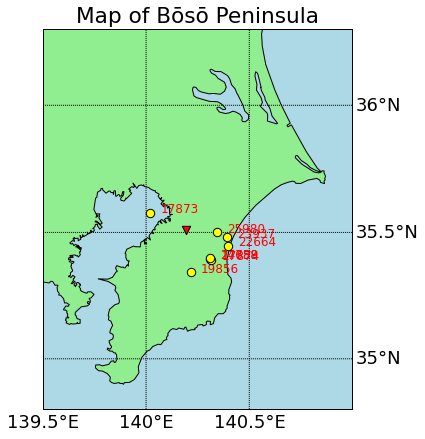

In [ ]:
# Define latlon range and map grids
lat0, lat1 = 34.8, 36.3
lon0, lon1 = 139.5, 141
latgrid = np.arange(34.,37.,0.5)
longrid = np.arange(139.,141.,0.5)

# Plot basemap
m = plotBasemap(lat0, lat1, lon0, lon1, latgrid, longrid, resolution='h',
                title='Map of Bōsō Peninsula')

# Plot Ichihara DAS site
ichi_lat, ichi_lon = 35.511241, 140.192608

x, y = m(ichi_lon, ichi_lat) # Convert lat lon to Mpl basemap coordinates
plt.scatter(x, y, 70, marker='v', color='red', zorder=10, edgecolors='black',
            lw=1) # zorder must be defined representing how many decimals

# Plot event epicentres
epi_lats, epi_lons = df_select.Lat.values, df_select.Lon.values
mag = df_select.Mag.values

epi_x, epi_y = m(epi_lons, epi_lats)
plt.scatter(epi_x, epi_y, 70, marker='o', color='yellow', zorder=10, 
            edgecolors='black', lw=1)

# Add event ID as texts
txt_x, txt_y = m(epi_lons+0.05, epi_lats) # Text position spacing 0.05 degree
id = df_select.index
x0, y0 = m(lon0, lat0) # Map boundaries
x1, y1 = m(lon1, lat1)

for xi, yi, i in zip(txt_x, txt_y, id):  
  if (xi>=x0) & (xi<=x1) & (yi>=y0) & (yi<=y1):
    # Exclude events outside the map boundaries
    plt.text(xi, yi, '{}'.format(i), fontsize=12, color='red')
    print('ID:', i)

plt.show()

Far-away earthquakes.

ID: 17789
ID: 17873
ID: 17874
ID: 17875
ID: 19856
ID: 22664
ID: 23937
ID: 24658
ID: 24659
ID: 25980
ID: 25981


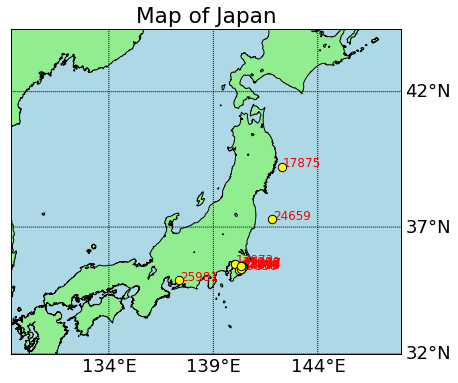

In [ ]:
# Define latlon range and map grids
lat0, lat1 = 32, 44.2
lon0, lon1 = 129.3, 148
latgrid = np.arange(32.,45.,5)
longrid = np.arange(129.,152.,5)

# Plot basemap
m = plotBasemap(lat0, lat1, lon0, lon1, latgrid, longrid, resolution='h', 
                title='Map of Japan')

# Plot Ichihara DAS site
ichi_lat, ichi_lon = 35.511241, 140.192608

x, y = m(ichi_lon, ichi_lat) # Convert lat lon to Mpl basemap coordinates
plt.scatter(x, y, 70, marker='v', color='red', zorder=10, edgecolors='black',
            lw=1) # zorder must be defined representing how many decimals

# Plot event epicentres
epi_lats, epi_lons = df_select.Lat.values, df_select.Lon.values
mag = df_select.Mag.values

epi_x, epi_y = m(epi_lons, epi_lats)
plt.scatter(epi_x, epi_y, 70, marker='o', color='yellow', zorder=10, 
            edgecolors='black', lw=1)

# Add event ID as texts
txt_x, txt_y = m(epi_lons+0.05, epi_lats) # Text position spacing 0.05 degree
id = df_select.index
x0, y0 = m(lon0, lat0) # Map boundaries
x1, y1 = m(lon1, lat1)

for xi, yi, i in zip(txt_x, txt_y, id):  
  if (xi>=x0) & (xi<=x1) & (yi>=y0) & (yi<=y1):
    # Exclude events outside the map boundaries
    plt.text(xi, yi, '{}'.format(i), fontsize=12, color='red')
    print('ID:', i)

plt.show()

In [ ]:
df_select

,Date,Time,Lat,Lon,Dep,Mag,Loc,UTM_E,UTM_N,HypoDistance,EpiDistance,IncAngle,Azimuth
17789,2020-02-20,12:53:08.270000,35.396,140.311,27.7,4.3,.0V KUJUKURI COAST BOSO PEN K,437.431512,3917.177309,33.034653,16.704440,30.375450,-39.639909
17873,2020-02-20,15:33:27.440000,35.578,140.019,45.6,2.0,CENTRAL CHIBA PREF K,411.114746,3937.586876,49.549343,17.383251,20.537911,-64.272232
17874,2020-02-20,15:33:36.830000,35.392,140.316,27.5,2.8,KUJUKURI COAST BOSO PEN K,437.882505,3916.730533,33.187917,17.336315,31.491245,-39.845710
17875,2020-02-20,15:33:46.620000,39.279,142.267,30.5,1.3,E OFF IWATE PREF A,609.281372,4348.503288,457.601516,456.529799,86.077899,23.563762
19856,2020-02-22,07:32:40.720000,35.343,140.216,21.2,1.4,SOUTHERN BOSO PENINSULA A,428.757779,3911.363505,28.927095,18.782353,40.488822,-6.060581
22664,2020-02-26,22:23:52.520000,35.448,140.398,30.1,1.3,KUJUKURI COAST BOSO PEN A,445.367257,3922.892861,36.763922,19.919235,32.807263,-68.970404
23937,2020-02-29,03:38:40.670000,35.482,140.391,29.9,0.8,KUJUKURI COAST BOSO PEN A,444.755241,3926.667586,35.737481,18.294195,30.790803,-79.374339
24658,2020-03-01,07:22:10.870000,35.398,140.311,28.1,1.4,KUJUKURI COAST BOSO PEN A,437.433057,3917.399121,33.296003,16.535230,29.776174,-40.134372
24659,2020-03-01,07:22:22.440000,37.300,141.815,34.8,1.7,E OFF FUKUSHIMA PREF A,572.230260,4128.464508,248.589228,246.026918,81.766470,36.243483
25980,2020-03-03,17:54:23.700000,35.500,140.345,22.6,3.1,CENTRAL CHIBA PREF K,440.595595,3928.690641,27.210277,13.886655,30.686877,-84.420149


In [ ]:
catalog_df[(catalog_df.Date=='2020-02-06') & (catalog_df.Mag>5)]

,Date,Time,Lat,Lon,Dep,Mag,Loc,UTM_E,UTM_N,HypoDistance,EpiDistance,IncAngle,Azimuth,TDMSDatetime
9637,2020-02-06,20:19:56.610000,36.343,141.725,54.0,5.7,.3W FAR E OFF IBARAKI PREF K,565.058921,4022.237197,175.002045,166.200709,71.751485,56.307964,06/02/2020 20:19:00


In [ ]:
"""
2020-02-06
YSS
http://ds.iris.edu/pub/userdata/wilber/y-nuwara/2020-02-06-mww53-near-east-coast-of-honshu-japan-2/timeseries_data/
MAJO
http://ds.iris.edu/pub/userdata/wilber/y-nuwara/2020-02-06-mww53-near-east-coast-of-honshu-japan-3/timeseries_data/

"""

'\n2020-02-06\nYSS\nhttp://ds.iris.edu/pub/userdata/wilber/y-nuwara/2020-02-06-mww53-near-east-coast-of-honshu-japan-2/timeseries_data/\nMAJO\nhttp://ds.iris.edu/pub/userdata/wilber/y-nuwara/2020-02-06-mww53-near-east-coast-of-honshu-japan-3/timeseries_data/\n\n'

In [ ]:
!pip install -q obspy

     |████████████████████████████████| 24.7MB 1.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done


In [ ]:
from obspy.geodetics.base import gps2dist_azimuth

In [ ]:
from obspy.geodetics import base

epi_lat, epi_lon = (36.3667, 141.8412)
ichi_lat, ichi_lon = (35.511241, 140.192608)

# Calculate distance (in m), azimuth, back azimuth
delta, az, baz = gps2dist_azimuth(epi_lat, epi_lon, ichi_lat, ichi_lon)

# Convert distance in m to km to deg
delta = (delta / 1e3) / 111.195 

delta

1.5869135551086386